In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [30]:
#pizza_id: A unique identifier assigned to each distinct pizza variant available for ordering.
#order_id: A unique identifier for each order made, which links to multiple pizzas.
#pizza_name_id: An identifier linking to a specific name of the pizza.
#quantity: The number of units of a specific pizza variant ordered within an order.
#order_date: The date when the order was placed.
#order_time: The time when the order was placed.
#total_price: The aggregated cost of all units of a specific pizza variant in an order.
#piunit_price: The cost of a single unit of the specific pizza variant.
#

In [74]:
df = pd.read_csv('pizza_sales.csv')
df.head()


,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [32]:
df.isna().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

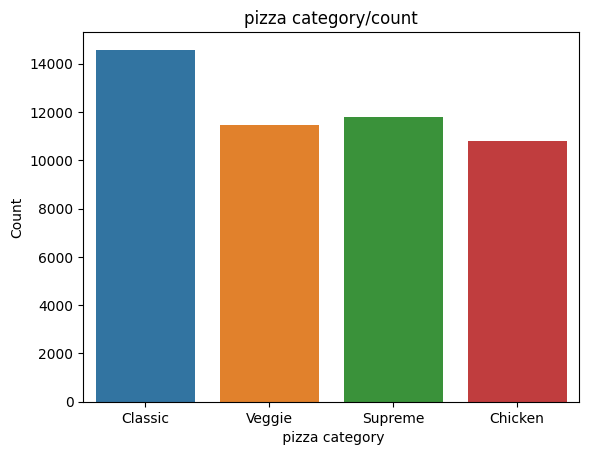

In [43]:
graph = sns.countplot(x="pizza_category",data=df,hue="pizza_category")
plt.title("pizza category/count")
plt.xlabel(" pizza category")
plt.ylabel("Count")

plt.show()

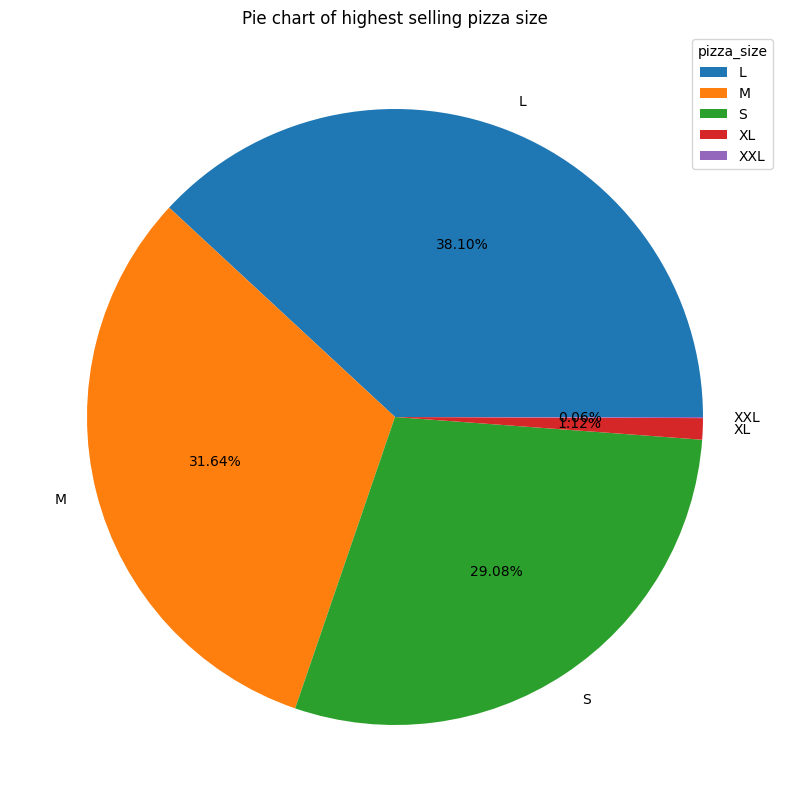

In [34]:
category_counts=df["pizza_size"].value_counts()

plt.figure(figsize=(10,10))
plt.pie(category_counts,labels=category_counts.index,autopct='%.2f%%')
plt.title("Pie chart of highest selling pizza size")

plt.legend(labels=category_counts.index,title="pizza_size",loc="upper right")
plt.show()

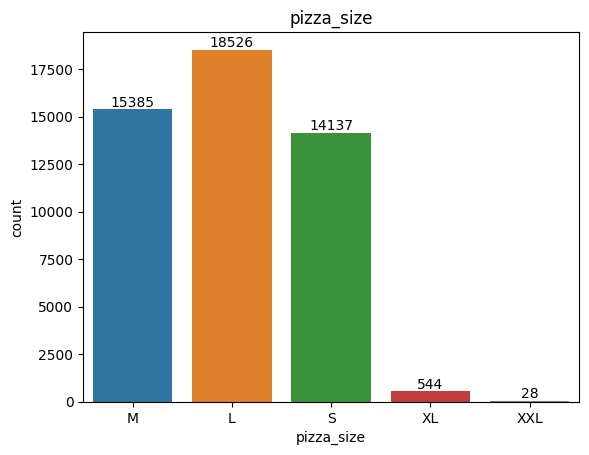

In [35]:
graph=sns.countplot(x="pizza_size",hue='pizza_size',data=df)
plt.title('pizza_size')

for container in graph.containers:
    graph.bar_label(container)

plt.show()
    

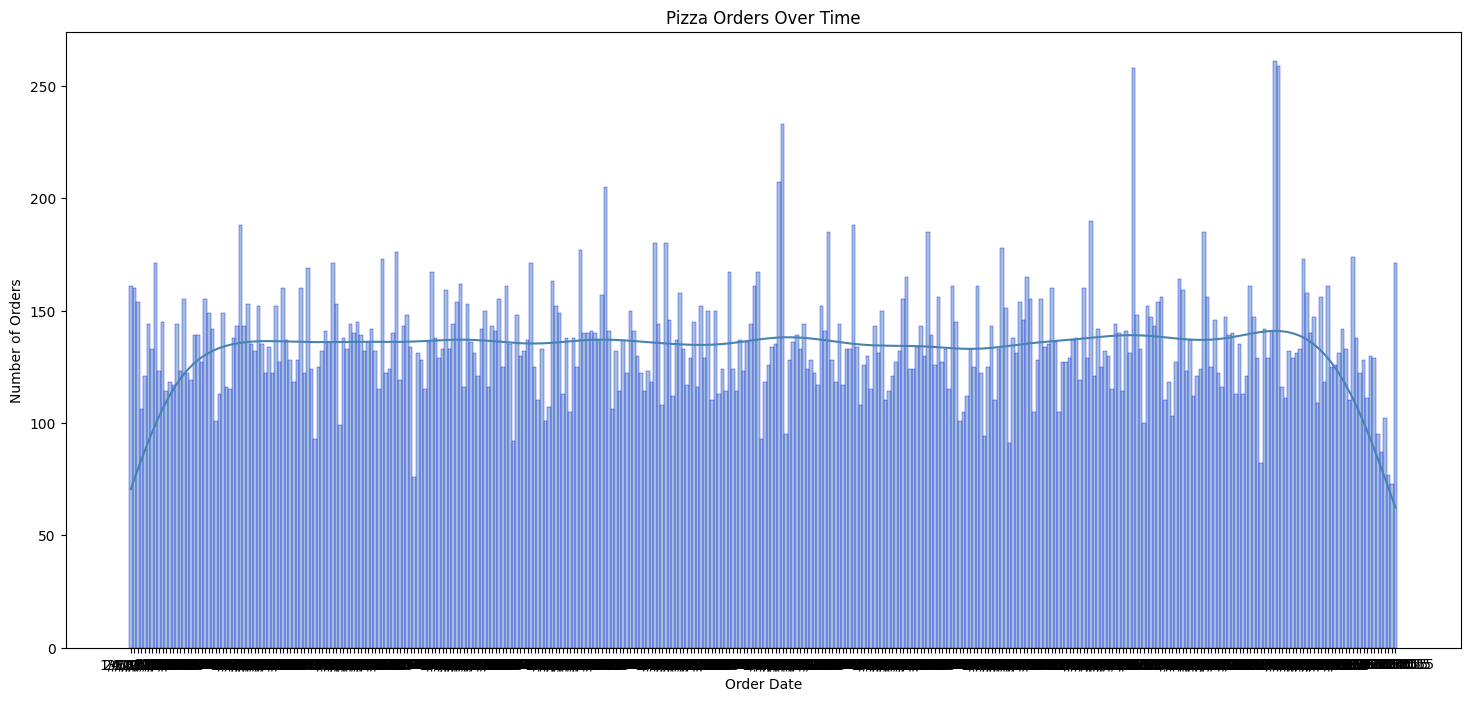

In [48]:
plt.figure(figsize=(18,8))
sns.histplot(df['order_date'], bins=30, color='steelblue', edgecolor='blue', kde=True)
plt.title('Pizza Orders Over Time')
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')

plt.show()

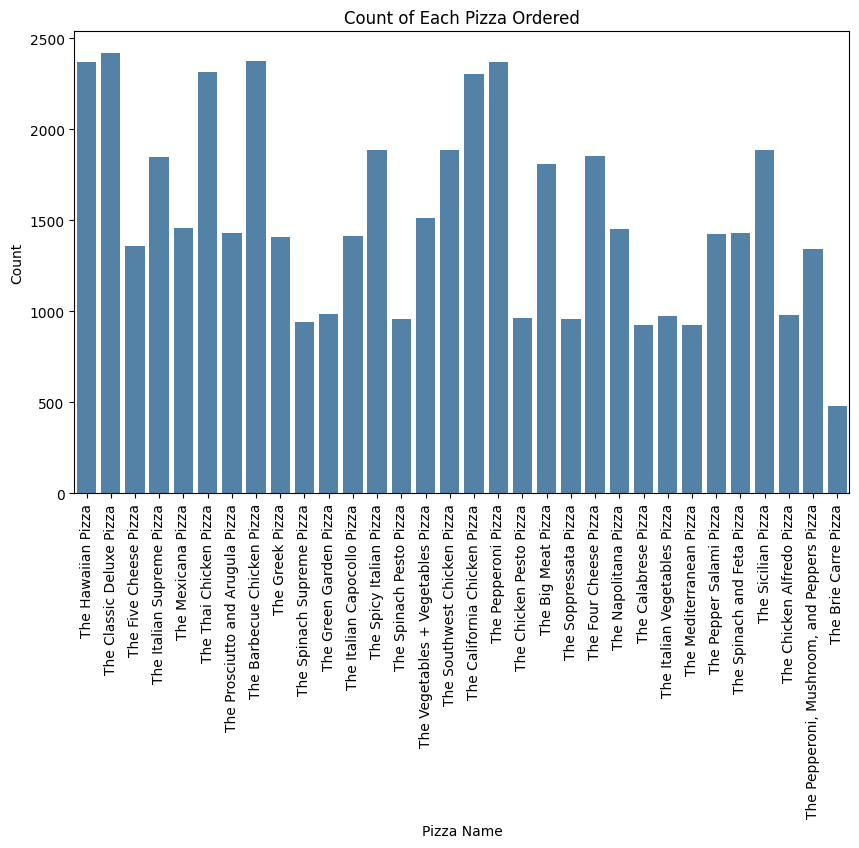

In [49]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='pizza_name', color='steelblue')
plt.title('Count of Each Pizza Ordered')
plt.xlabel('Pizza Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()



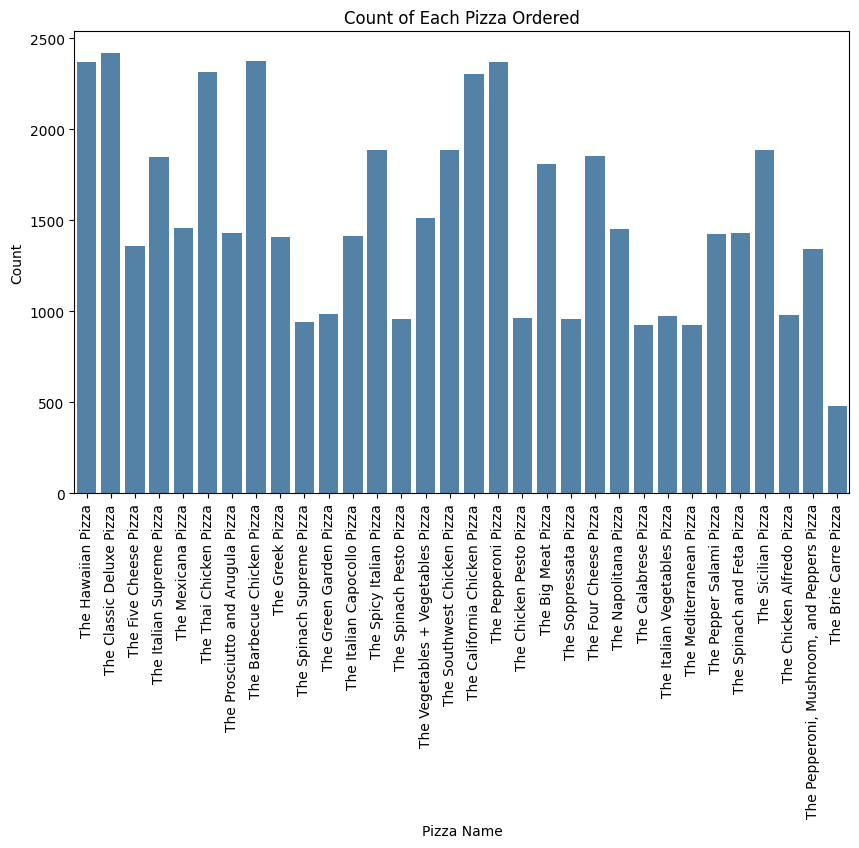

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='pizza_name', color='steelblue')
plt.title('Count of Each Pizza Ordered')
plt.xlabel('Pizza Name')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.show()

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  int64  
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 4.5+ MB


<Axes: >

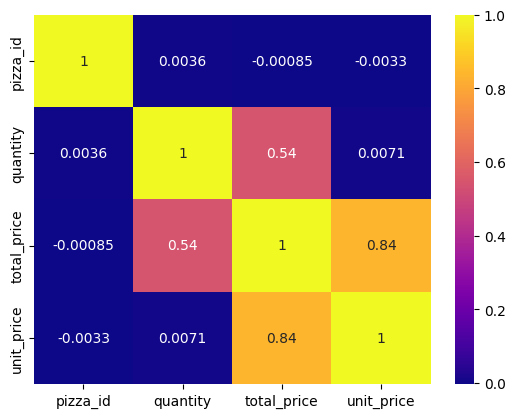

In [53]:
df=df[["pizza_id","quantity","total_price","unit_price"]]

corr = df.corr()
sns.heatmap(corr,annot=True,cmap="plasma")

In [76]:
pizza_sizes={'M':1, 'L':2, 'S':3, 'XL':4, 'XXL':5}
df["pizza_size"]=df["pizza_size"].map(pizza_sizes)

In [62]:
df["pizza_size"].unique()

array([1, 2, 3, 4, 5])

In [63]:
df["pizza_category"].unique()

array(['Classic', 'Veggie', 'Supreme', 'Chicken'], dtype=object)

In [78]:
pizza_categories={'Classic':1, 'Veggie':2, 'Supreme':3, 'Chicken':4}
df["pizza_category"]=df["pizza_category"].map(pizza_categories)

<Axes: >

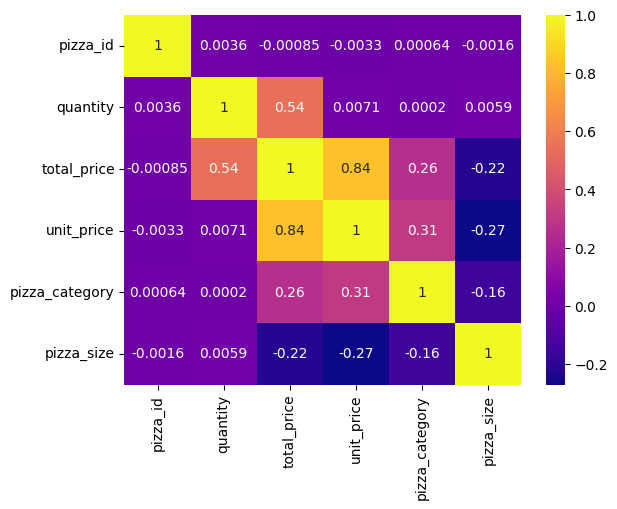

In [79]:
dff=df[["pizza_id","quantity","total_price","unit_price","pizza_category","pizza_size"]]
corr = dff.corr()
sns.heatmap(corr,annot=True,cmap="plasma")

In [71]:
df.columns

Index(['pizza_id', 'quantity', 'total_price', 'unit_price'], dtype='object')

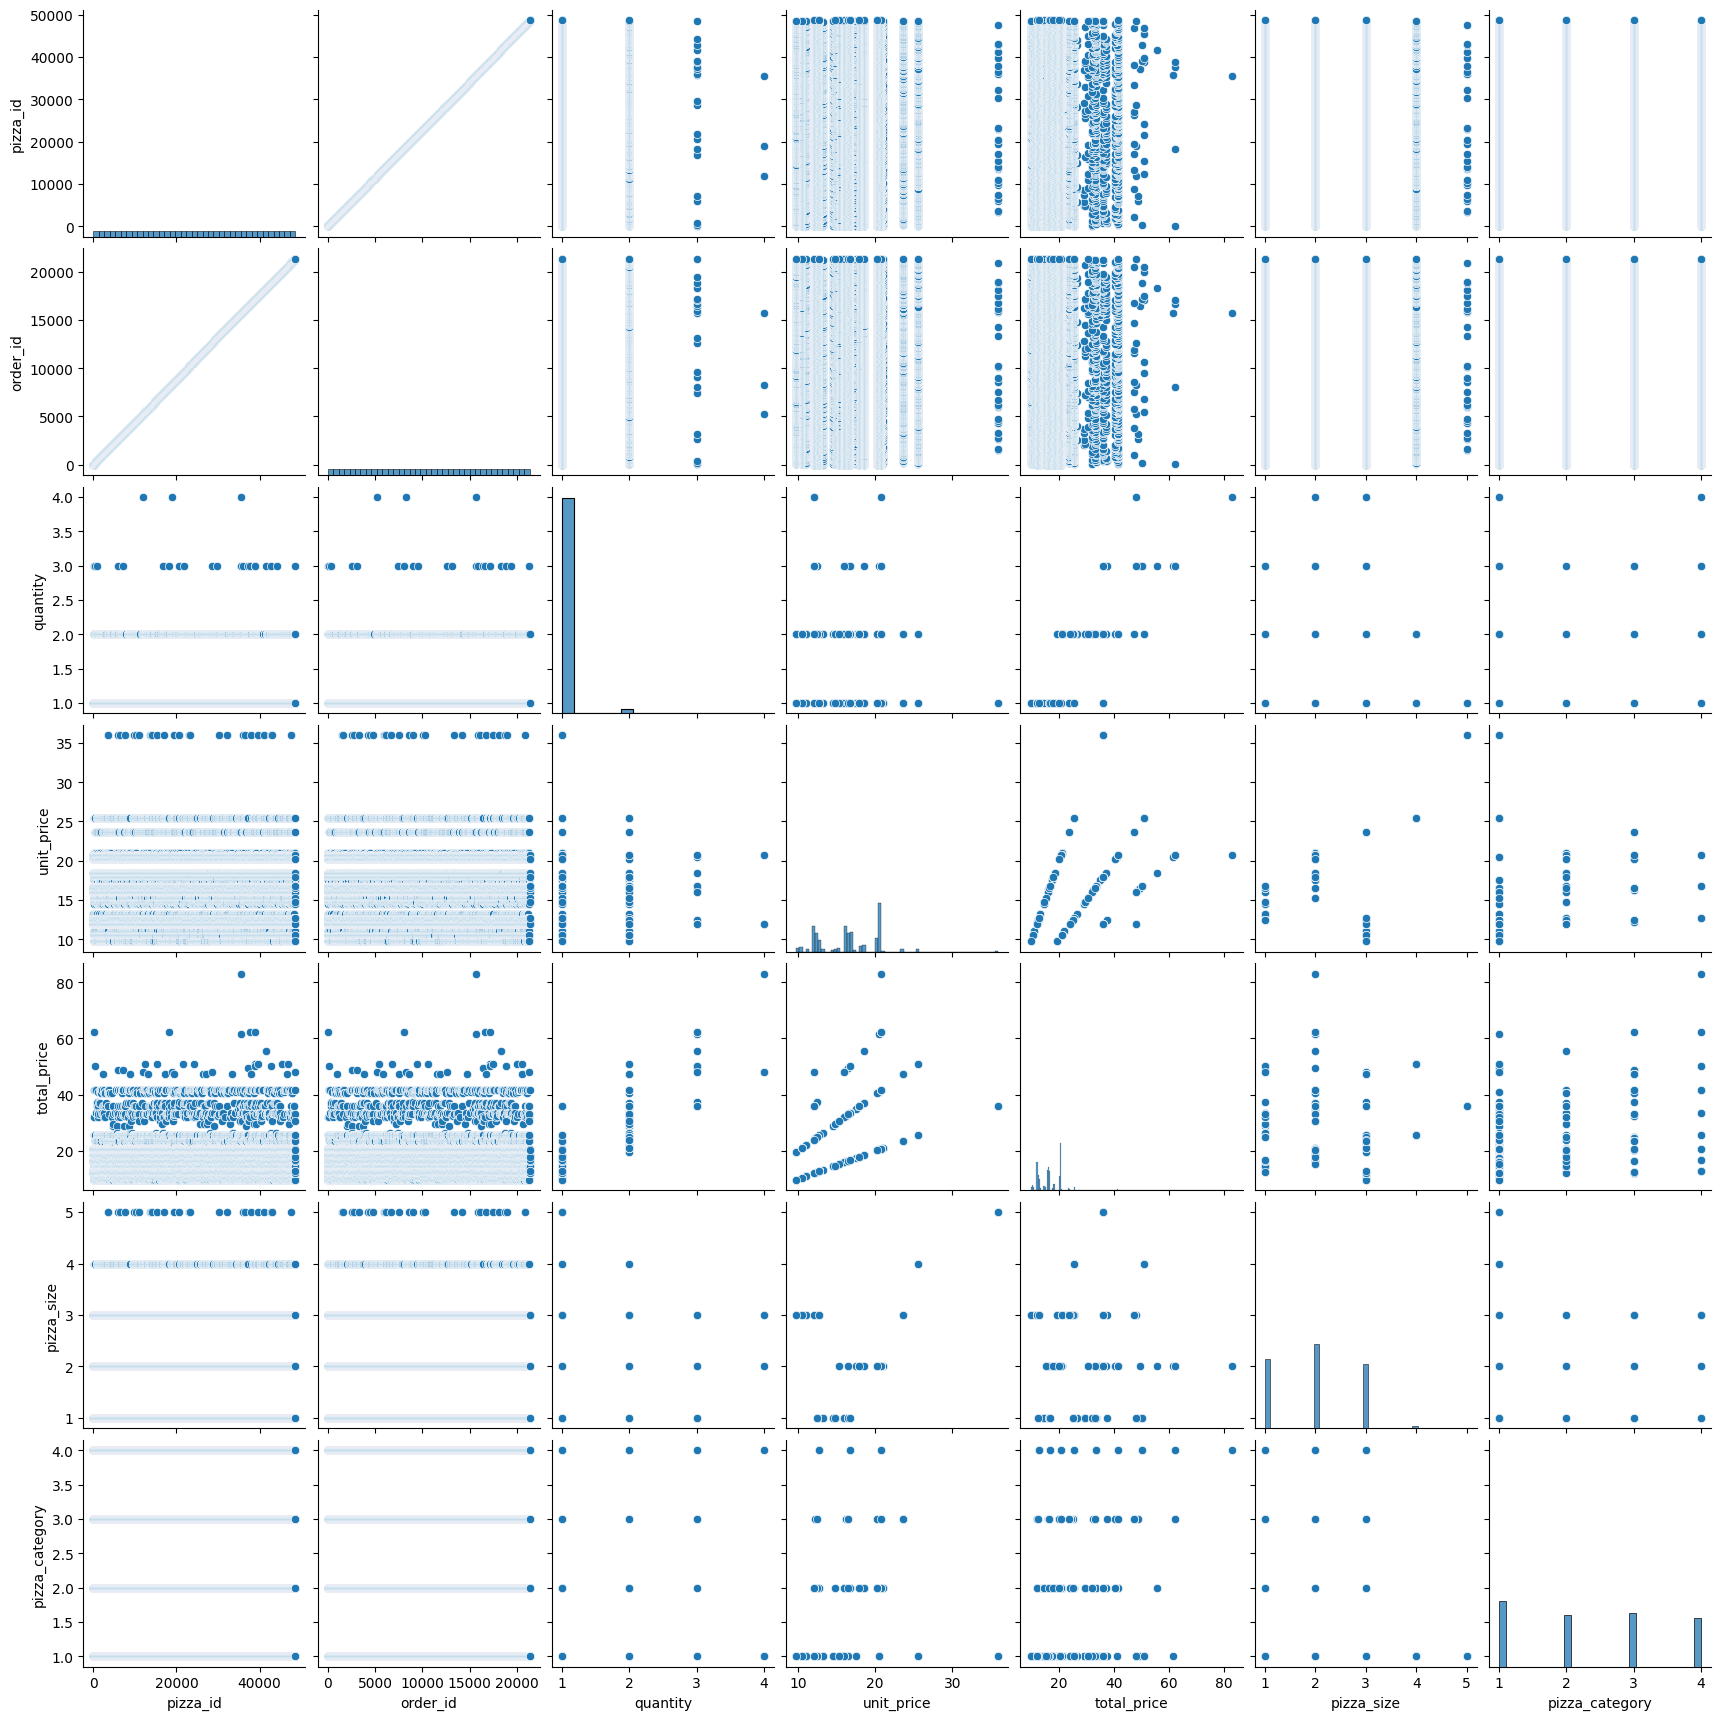

In [80]:
sns.pairplot(df)